<img src="data/drill_ship.png" style="width:300px; float:left">
<h1 style="text-align: center; color:teal">Data Science and Machine Learning for Planet Earth - Assessment</h1>

<h3 style="text-align: center; color:darkgray">Taken by MSc students on the ACSE, EDSML and GEMS courses</h3>

<h2 style="text-align: center; color:darkred">09:00 – 17:00 BST, Friday 17th of November 2023</h2>

<h2 style="text-align: center; color:red">REMINDER: THIS IS AN INDIVIDUAL ASSESSMENT</h2>

# 🐟 Read the `README.md` file for important information:

We strongly recommend that you read the `README.md` file, and even keep it open on GitHub for referencing during the assessement. It contains more detail on:

- <h3 style="color:teal">Description of the features of your data, and what they mean</h3>
- <h3 style="color:brown">A recommended workflow for this assessment</h3>
- <h3 style="color:teal">A reminder about what constitutes plagiarism</h3>
- <h3 style="color:brown">Details about the assessment criteria</h3>
- <h3 style="color:teal">Submitting your assessment</h3>
- <h3 style="color:brown">Referrencing your sources</h3>

To keep this notebook tidy and small, all of the above are available in the `README.md` file in this repo. 

# 🌊 Predicting Lithologies for the Ocean Drilling Program

In this assessment, you are the **boss of your own AI consluting company**: ***<span style="color:teal">MSC-AI Consulting</span>***. Your client is the **Integrated Ocean Drilling Program** (IODP), a reputable research institution with the mission of drilling the seafloor in order to understand the dynamic of the Earth and its past climates. You know that IODP has approached other, competing AI consulting companies: so don't let them see your answer, and try to do better than them to convince the client to give you the best score!

IODP routinely uses two different types of data:

1. **Cores**: A core is a piece of rock recovered from the seafloor. This allows geologist to perform analysis on the material, and to identify exactly what type of rock is present. Cores are however difficult to recover, and expensive. You can <a href="https://www.ga.gov.au/scientific-topics/marine/survey-techniques/sedimentary-coring-drilling">learn more about cores here if you want</a>.
2. **Downhole (wireline) logs**: IODP can also use downhole or wireline logs, i.e. data from  instruments that are lowered in a drill hole by research geologists. Drill holes can be very deep, down to several kilometers below the water-sediment interface (the unit used is `Depth_WMSF`, also known as meters below seafloor - larger numbers means deeper in the well). Downhole logs record properties of the rocks they measure, including natural gamma radiation (total gamma ray `HCGR`, potassium `HFK`, thorium `HTHO`, uranium `HURA`, shallow and deep penetration resistivity (`IDPH` and `IMPH`) and neutron porosity (`SFLU`). The goal is to use these properties measured continuously to estimate the **lithology** (i.e. type of rock) present. More details are provided <a href="https://en.wikipedia.org/wiki/Well_logging">on this website if you are interested</a>.

IODP has been experimenting recently with a brand new type of downhold log called <code>munsel_color</code>. They reckon that this new log type alongside the others could help in the identification of the lithology from wireline log data. They are very excited to test this, and have contacted you to help them - so you see this type of log for the first time.

## ⛴️ Your task

You are given drilling and logging data (`data/lithology.csv`) that can be used for training and testing, and that contains data from a single well (a drilling location) from 0 to 450 MWSF. In the context of the Integrated Ocean Drilling Program (IODP), the acronym **WMSF** stands for **Water-Depth Meters Below Seafloor**. This unit of measurement is commonly used in ocean drilling and marine geology to specify the depth below the seafloor at which samples are taken or observations are made. 

You are also being given a second file file (`data/new_samples.csv`) that contains logging data **in the same well** but from 450 WMSF down to 700 MWSF (so deeper than your training data). There is no core data in this interval, only logging data. This means that the `lithology` is not known, and **your goal is to use this wireline log data to predict lithology**. 

The following diagrams illustrates this situation:

<img src="data/well.jpg" style="width:600px;">

IODP wants you to train the best algorithm to classify lithology based on the log data provided. The also give you some strict guidance about what they want:

1. 🪸 You can prepare your data any way you want, and select any features you want. But as mentioned previously, IODP is very keen on using their new logging tool called `munsell_color` for your predictions. They stipulate that you need to use this feature in your data pipeline - how you use it is up to you.
<br><br>
2. 🪸 To predict `lithology`, you can use **any parametric model** from sklearn that you prefer. This includes for instance `LogisticRegression`, `SVC(kernel="linear")`, and many others. If you don't know whether your algorithm is parametric, you can try to call the `.coef_` method on it after you `fit` it. If you get an error, it is not parametric and using this model would disqualify you (for instance, `SVC()`, `RandomForest`, `KNeighborsClassifier` are not parametric). You are also told that using `ensemble methods` is not allowed. And you are strongly discouraged from using `MLPClassifier` (too long to train, and too many coefficients - see criteria 2 below).
<br><br>
3. 🪸 You need to put your entire workflow within a `pipeline` object. This pipeline can be of arbitrary complexity, but it needs to ***1.*** be able to take raw data and produce a predictions of labels directly, and ***2.*** the last position of your pipeline should be your parametric estimator (so if IODP does something like `pipeline[-1]` in their automatic testing they will obtain your estimator object).
<br><br>
4. 🪸 IODP will assess the performance of your algorithm in two ways. First, they will use the `F1 macro averaging` score on the label of your **unseen data** (i.e. the data in `data/new_samples.csv`), and subtract the `F1 macro averaging` score of your **test set** (which you can choose as you see fit). The smaller the difference between your test set score and the unseen data score, the better. This implies that they will want to have access to your test and train sets (see **Part C - Writing a class** for details).
<br><br>
5. 🪸 IODP also prefers a balance between high F1 macro score, but simpler models with **as few model coefficients (i.e. model weights) as possible** (as a reminder, the number of weights is exactly proportional to the number of features seen by the classifier). This is why, as a second assessment of your model performance, IODP will look at the ratio of your `F1 macro` score on the predicted **unseen data** divided by the **number of coefficients** in your model (i.e. `model.coef_.shape[1]`), this ratio then multiplied by 100 (higher=better). Hence, you should aim for as few weights as possible (i.e. coefficients) in your model whilst maintaining a decent performance. And as a reminder of point 1. above, you need to include the `munsell_color` feature one way or another in your classifier.
<br><br>
6. 🪸 For fairness, IODP wants you to set `random_state=42` for any algorithm that requires a random state. Failure to do so might result in a lower score.

# Run the cell below first

This will help automatically reload your class when you make changes to it in **Part C**.

In [389]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# 🐳  PART A: Exploratory Data Analysis (EDA) [30 marks]

In this first task, the client wants you to use this notebook to do some <b>Exploratory Data Analysis</b>. <br>
Make sure to keep the notebook clean, and running from top to bottom. Use markdown cells to explain what you are doing, why, and what your finding and conclusions are. Your goal is the understand your data and how you can best model it.

In [390]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [391]:
import pandas as pd
# Load the data:

df = pd.read_csv('data/log_data.csv') # This is your EDA (Part A) and training data (Parts B and C)

new_samples = pd.read_csv('data/new_data.csv') # This is the file you need to predict in parts B and C

## Step 1: remove duplicates

In [392]:
# Create as many cell as you need - keep your notebook clean
df.duplicated().sum()

551

In [393]:
df = df.drop_duplicates()

In [394]:
df.duplicated().sum()

0

In [395]:
df

,DEPTH_WMSF,HCGR,HFK,HTHO,HURA,IDPH,IMPH,SFLU,munsel_color,lithology
0,0.0724,5.8481,0.0959,1.3131,-0.1712,1950.0000,1765.0116,0.0915,5R 4 10,Sandy Mud
1,0.0736,0.5881,0.0116,0.1206,0.0077,46.6488,124.4472,1.5966,10PB 0.2 18,Sandy Mud
2,0.0880,1.9945,0.0354,0.4317,0.0501,1950.0000,1950.0000,0.1589,2.5YR 8 10,Interbedded sand and mud
3,0.0920,22.4306,0.6522,3.3707,0.0916,1950.0000,1950.0000,9700.0000,10PB 0.2 18,Sandy Mud
4,0.2248,7.6691,0.1369,1.6566,-0.2301,1950.0000,1765.0116,0.0915,10PB 0.2 18,Sandy Mud
...,...,...,...,...,...,...,...,...,...,...
11626,448.7536,47.1289,1.3832,7.0139,2.0609,1.1912,1.0928,0.6569,5P 3 6,Marl
11627,448.8916,24.7224,0.5522,4.6946,1.2829,0.9957,1.0211,0.8279,5P 3 6,Marl
11628,448.9060,47.6344,1.3817,7.1851,1.9657,1.1873,1.0805,0.5863,10PB 1 42,Mud
11629,449.0440,25.9426,0.5665,5.0022,1.1771,0.9915,1.0273,0.8255,5P 3 6,Marl


## Step 2: Geographic train-test-split

We have geographical data, so we have to be careful how we split data

In [396]:
sorted_data = df.sort_values(by='DEPTH_WMSF')

# Finding the depth that splits the data into 70% training and 30% testing
split_index = int(sorted_data.shape[0] * 0.7)
df_train = sorted_data.iloc[:split_index]
df_test = sorted_data.iloc[split_index:]


##### We split according to depth. 70% for training set and 30% for test set

In [397]:
X_train = df_train.drop(columns = 'lithology')
X_test = df_test.drop(columns = 'lithology')
y_train = df_train['lithology']
y_test = df_test['lithology']

###### We also need a validation set, we'll take 30% of our X_train

In [398]:
Save_X_train = X_train.copy()

In [399]:
Save_y_train = y_train.copy()

In [400]:
split_index_validation = int(Save_X_train.shape[0]* 0.7)

In [401]:
X_train = Save_X_train.iloc[:split_index_validation]

In [402]:
X_train_validation = Save_X_train.iloc[split_index_validation:]

In [403]:
X_train.shape

(5428, 9)

In [404]:
X_train_validation.shape

(2327, 9)

In [405]:
y_train = Save_y_train.iloc[:split_index_validation]

In [406]:
y_train_validation = Save_y_train.iloc[split_index_validation:]

###### analyse 

In [407]:
X_train.describe()

,DEPTH_WMSF,HCGR,HFK,HTHO,HURA,IDPH,IMPH,SFLU
count,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000
mean,92.559867,31.223394,0.863920,4.950911,1.044711,677.809941,765.830807,1135.431455
std,51.395490,22.745032,0.676928,3.398172,0.668462,921.742096,913.623318,3117.659285
min,0.072400,0.029500,-0.070000,-0.136600,-0.510500,0.339900,0.412000,0.091500
25%,49.309600,9.501275,0.220000,1.749125,0.497600,1.281550,1.142225,0.534900
50%,92.749200,25.382200,0.696000,3.991500,0.929700,2.560100,124.447200,0.722850
75%,136.757800,53.028200,1.508375,8.090200,1.563425,1950.000000,1950.000000,1.596600
max,181.862400,86.284700,2.518300,13.970500,3.238300,1950.000000,1950.000000,9700.000000


In [408]:
X_train.isnull().sum()

DEPTH_WMSF      0
HCGR            0
HFK             0
HTHO            0
HURA            0
IDPH            0
IMPH            0
SFLU            0
munsel_color    0
dtype: int64

In [409]:
X_train.munsel_color.value_counts()

10B 8 12       1628
2.5G 1 8       1507
10R 1 12        776
5P 3 6          315
10PB 0.2 18     244
5R 4 10          38
7.5YR 9 20       35
10PB 2 42        33
10P 5 30         33
7.5P 2 16        33
5PB 1 14         31
10P 5 14         30
5BG 0.4 2        30
5GY 6 16         29
10B 2 6          29
2.5R 8 6         29
10R 2 16         29
10PB 1 42        29
7.5P 0.8 16      29
2.5BG 3 24       29
5Y 6 16          28
5PB 3 32         28
2.5G 7 2         28
5YR 5 14         27
10GY 4 4         27
5PB 5 18         27
10RP 5 22        27
2.5YR 8 10       26
10GY 6 18        26
2.5P 8 2         26
2.5R 6 22        24
10Y 2 2          24
7.5PB 4 34       23
2.5P 0.4 22      23
10G 4 18         22
10BG 6 12        22
2.5BG 5 16       22
7.5G 1 2         22
5P 7 20          21
5G 7 34          19
Name: munsel_color, dtype: int64

In [410]:
X_train.dtypes

DEPTH_WMSF      float64
HCGR            float64
HFK             float64
HTHO            float64
HURA            float64
IDPH            float64
IMPH            float64
SFLU            float64
munsel_color     object
dtype: object

In [411]:
cat_data = ['munsel_color']
num_data = X_train.columns.tolist()
num_data.remove('munsel_color')

In [412]:
num_data

['DEPTH_WMSF', 'HCGR', 'HFK', 'HTHO', 'HURA', 'IDPH', 'IMPH', 'SFLU']

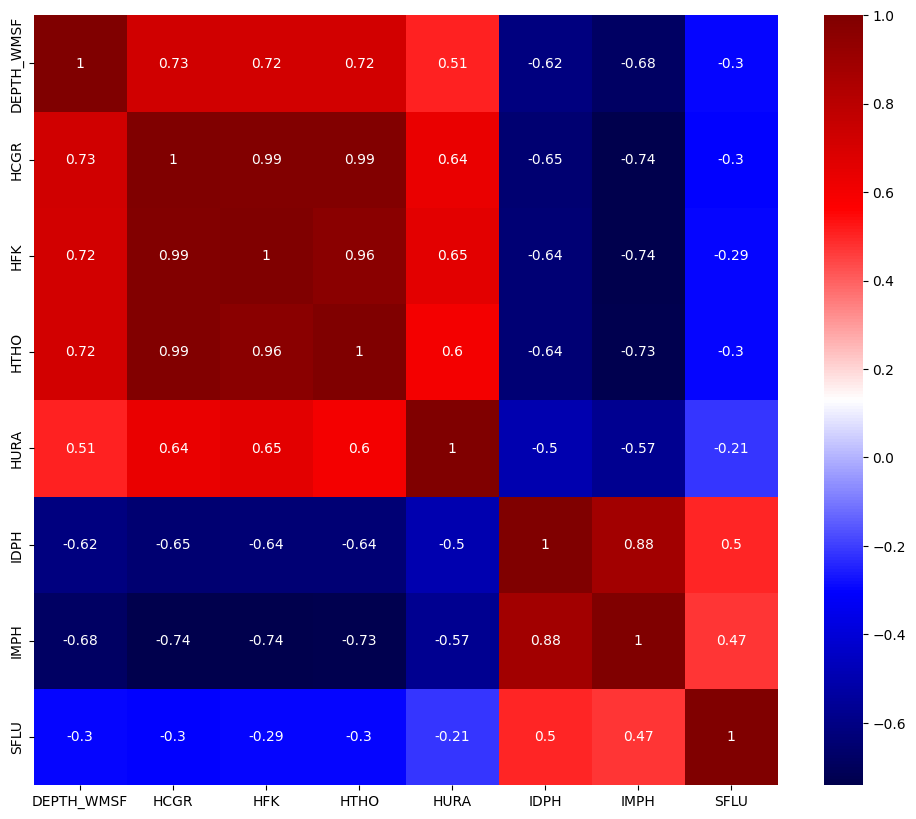

In [413]:
fig, ax = plt.subplots(figsize=(12,10))
corr = X_train[num_data].corr() 

sns.heatmap(corr, annot = corr, cmap='seismic', ax=ax);

###### Remove features that are strongly correlated with others 

In [414]:
num_data.remove('HFK' )
num_data.remove('HCGR' )
num_data.remove('IDPH' )

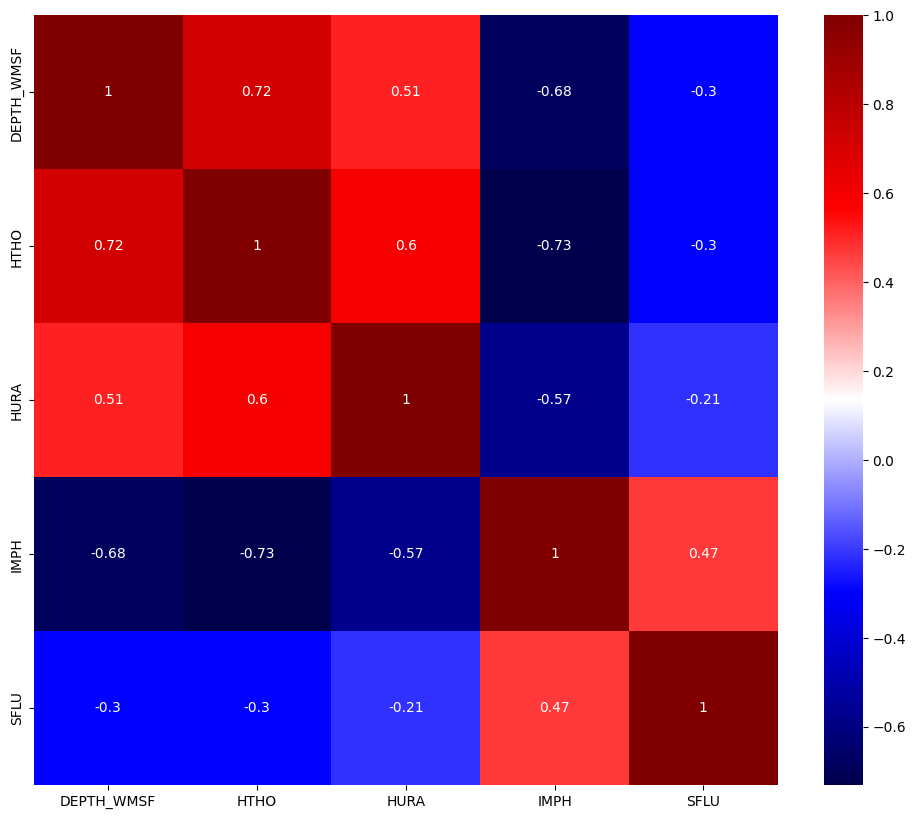

In [415]:
fig, ax = plt.subplots(figsize=(12,10))
corr = X_train[num_data].corr() 

sns.heatmap(corr, annot = corr, cmap='seismic', ax=ax);

###### The correlation coefficients between 'DEPTH_WMSF', 'HTHO', 'HURA', 'IMPH' are not high enough to draw any conclusions. Let's see what happens with plotting.scatter_matrix 

In [416]:
num_data

['DEPTH_WMSF', 'HTHO', 'HURA', 'IMPH', 'SFLU']

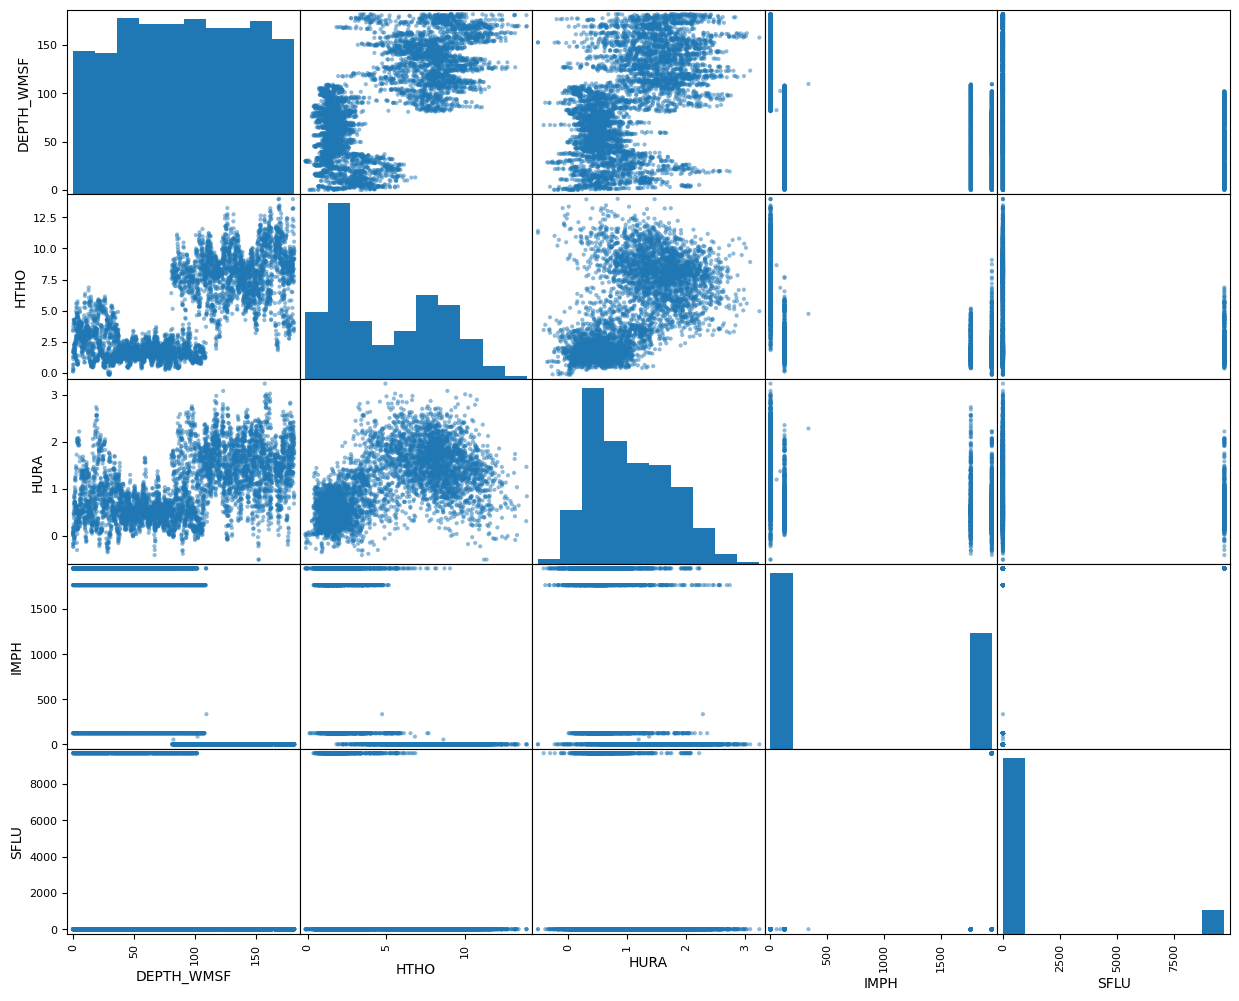

In [417]:
pd.plotting.scatter_matrix(X_train[num_data], figsize=(15,12));

###### We can't really draw any conclusions. I'm not sure that 'HTHO', 'HURA' and 'IMPH' will be useful for our model, but let's keep them for the time being

In [418]:
X_train[num_data].describe()

,DEPTH_WMSF,HTHO,HURA,IMPH,SFLU
count,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000
mean,92.559867,4.950911,1.044711,765.830807,1135.431455
std,51.395490,3.398172,0.668462,913.623318,3117.659285
min,0.072400,-0.136600,-0.510500,0.412000,0.091500
25%,49.309600,1.749125,0.497600,1.142225,0.534900
50%,92.749200,3.991500,0.929700,124.447200,0.722850
75%,136.757800,8.090200,1.563425,1950.000000,1.596600
max,181.862400,13.970500,3.238300,1950.000000,9700.000000


###### The minimum values of HTHO and HURA are slightly negative. This is not possible, so we transform these values into 0

In [419]:
X_train['HTHO'] = X_train['HTHO'].apply(lambda x: max(x, 0))
X_train['HURA'] = X_train['HURA'].apply(lambda x: max(x, 0))


/tmp/ipykernel_1602/3574401495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['HTHO'] = X_train['HTHO'].apply(lambda x: max(x, 0))
/tmp/ipykernel_1602/3574401495.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train['HURA'] = X_train['HURA'].apply(lambda x: max(x, 0))


In [420]:
X_train[num_data].describe()

,DEPTH_WMSF,HTHO,HURA,IMPH,SFLU
count,5428.000000,5428.000000,5428.000000,5428.000000,5428.000000
mean,92.559867,4.951042,1.047000,765.830807,1135.431455
std,51.395490,3.397979,0.664482,913.623318,3117.659285
min,0.072400,0.000000,0.000000,0.412000,0.091500
25%,49.309600,1.749125,0.497600,1.142225,0.534900
50%,92.749200,3.991500,0.929700,124.447200,0.722850
75%,136.757800,8.090200,1.563425,1950.000000,1.596600
max,181.862400,13.970500,3.238300,1950.000000,9700.000000


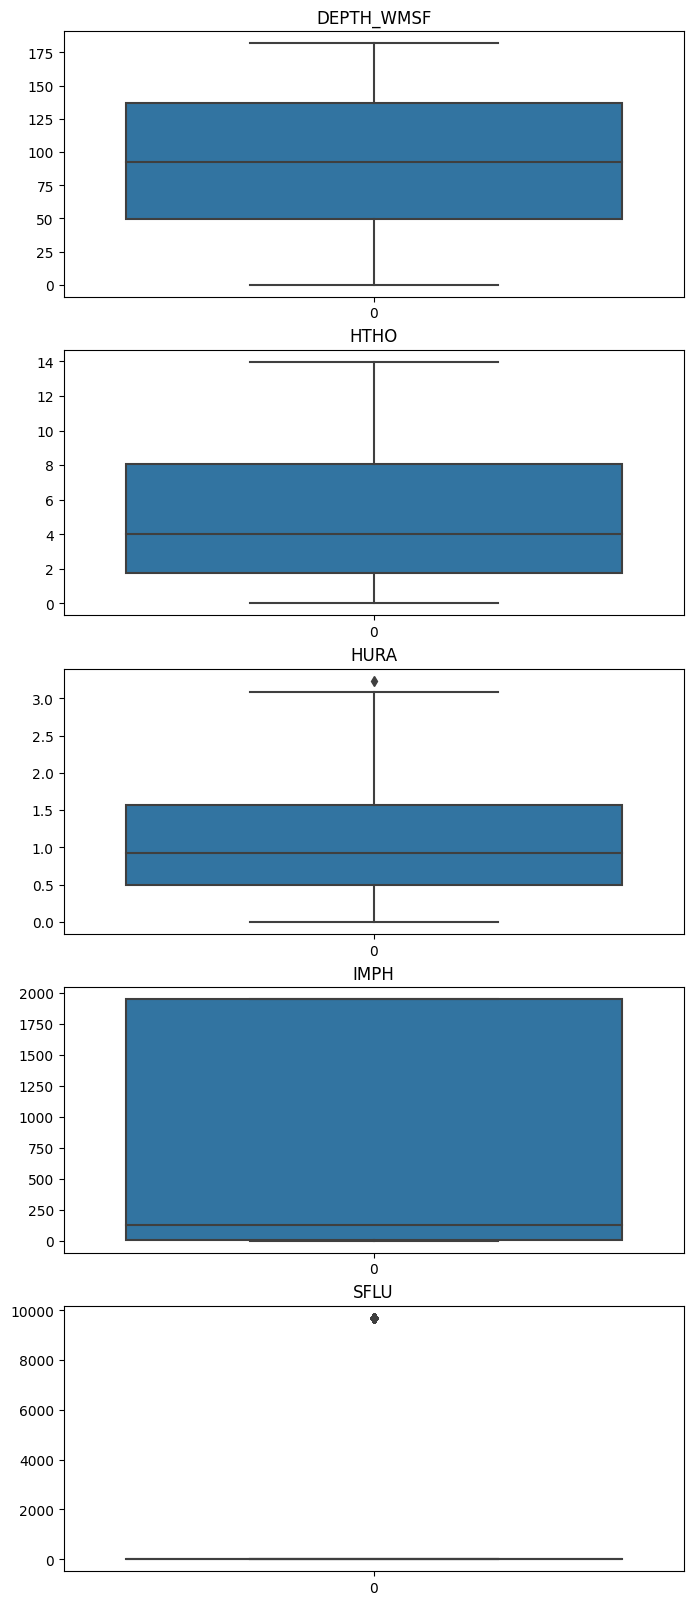

In [421]:
fig, axes = plt.subplots(len(num_data),1, figsize=(8,20))

for feature, ax in zip(X_train[num_data], axes):
    sns.boxplot(data = X_train[feature], ax=ax);
    ax.set_title(feature)

In [422]:
num_data

['DEPTH_WMSF', 'HTHO', 'HURA', 'IMPH', 'SFLU']

In [423]:
num_values_above_9000 = X_train[X_train['SFLU'] > 9000].shape[0]

num_values_above_9000

635

###### Given the number of values above 9000 for SFLU, they cannot be considered outliers. So we're going to keep them. For the rest, there are no outliers. 

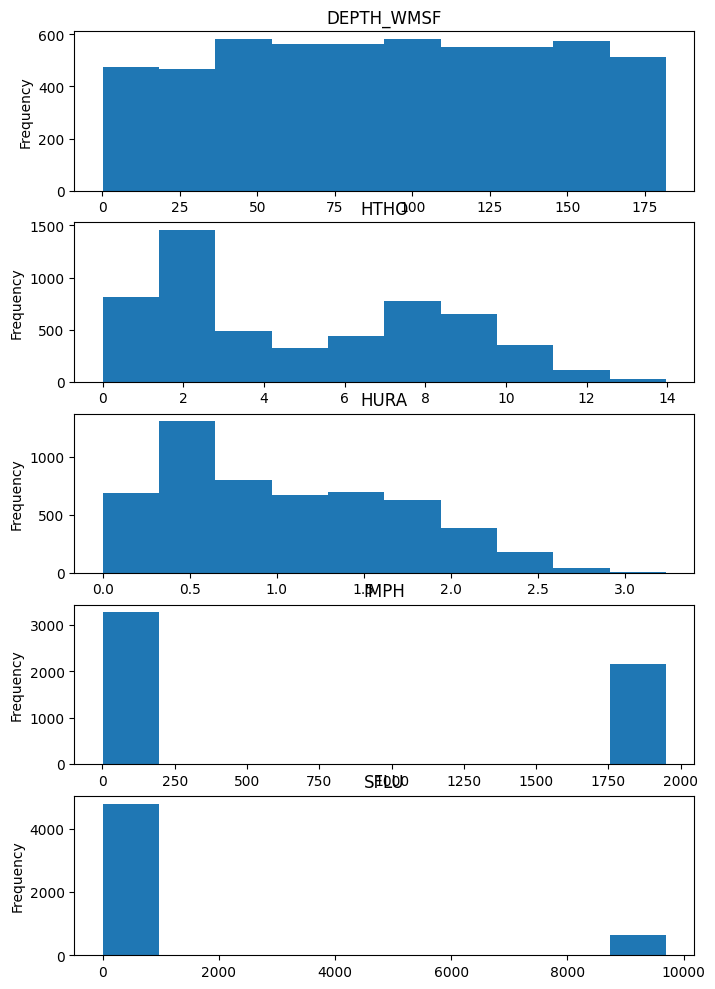

In [424]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(5,1,figsize=(8,12))

for ax, feature in zip(axes.flatten(), num_data):
    X_train[feature].plot(kind='hist',ax=ax)
    ax.set_title(feature)

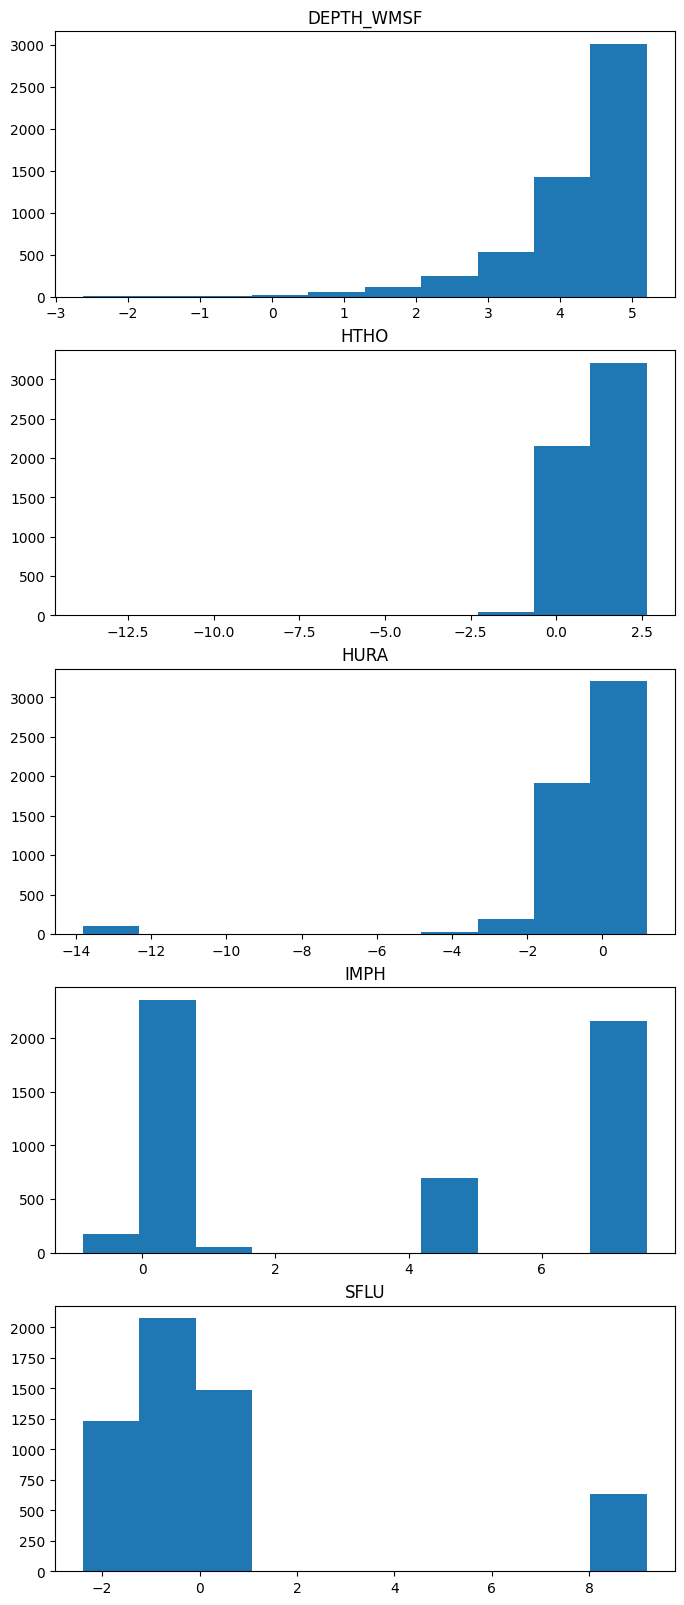

In [425]:
fig, axes = plt.subplots(len(num_data),1, figsize=(8,20))

for feature, ax in zip(X_train[num_data], axes):
    ax.hist(np.log(X_train[feature]+1e-6));
    ax.set_title(feature)

###### There's not much point in going to the log, a normal law doesn't emerge.  

In [426]:
y_train.value_counts()

Mud                          1974
Interbedded clay and mud     1846
Interbedded sand and mud      929
Marl                          390
Sandy Mud                     289
Name: lithology, dtype: int64

### unbalanced target

In [427]:
X_train.SFLU.value_counts()

0.0915       699
1.5966       693
9700.0000    635
0.1589       530
1.1648       281
            ... 
0.8217         1
0.7419         1
0.6417         1
0.8887         1
0.8005         1
Name: SFLU, Length: 2053, dtype: int64

In [428]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import MinMaxScaler

prepro_pipeline = make_pipeline(
    SimpleImputer(strategy='median'),  
    MinMaxScaler() 
)

X_train_preprocessed = prepro_pipeline.fit_transform(X_train[num_data])

X_test_preprocessed = prepro_pipeline.transform(X_test[num_data])

X_train[num_data] = pd.DataFrame(X_train_preprocessed, columns=X_train[num_data].columns, index=X_train.index)
X_test[num_data] = pd.DataFrame(X_test_preprocessed, columns=X_test[num_data].columns, index=X_test.index)


/tmp/ipykernel_1602/115581114.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[num_data] = pd.DataFrame(X_train_preprocessed, columns=X_train[num_data].columns, index=X_train.index)


In [429]:
X_train[cat_data]

,munsel_color
0,5R 4 10
1,10PB 0.2 18
2,2.5YR 8 10
3,10PB 0.2 18
4,10PB 0.2 18
...,...
5694,10B 8 12
5695,10PB 0.2 18
5696,10B 8 12
5697,10B 8 12


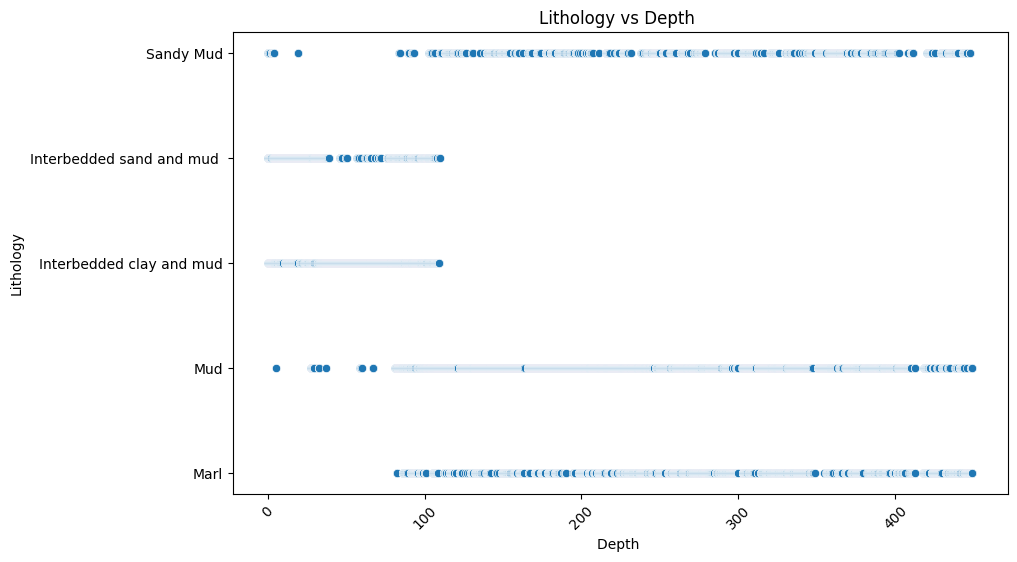

In [430]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='DEPTH_WMSF', y='lithology')
plt.xlabel('Depth ')
plt.ylabel('Lithology')
plt.title('Lithology vs Depth ')
plt.xticks(rotation=45)
plt.show()

## We take care of cat_data

In [431]:
X_train[cat_data].value_counts()

munsel_color
10B 8 12        1628
2.5G 1 8        1507
10R 1 12         776
5P 3 6           315
10PB 0.2 18      244
5R 4 10           38
7.5YR 9 20        35
7.5P 2 16         33
10P 5 30          33
10PB 2 42         33
5PB 1 14          31
10P 5 14          30
5BG 0.4 2         30
7.5P 0.8 16       29
5GY 6 16          29
2.5R 8 6          29
10B 2 6           29
10R 2 16          29
2.5BG 3 24        29
10PB 1 42         29
2.5G 7 2          28
5Y 6 16           28
5PB 3 32          28
5YR 5 14          27
10GY 4 4          27
5PB 5 18          27
10RP 5 22         27
10GY 6 18         26
2.5P 8 2          26
2.5YR 8 10        26
10Y 2 2           24
2.5R 6 22         24
7.5PB 4 34        23
2.5P 0.4 22       23
10G 4 18          22
10BG 6 12         22
2.5BG 5 16        22
7.5G 1 2          22
5P 7 20           21
5G 7 34           19
dtype: int64

###### Given the number of categories, onehotencoder is not the most suitable. However, for our problem, the calculation time is not very long, so we'll use it.

In [432]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline

onehot_pipeline = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))  
])

X_train_onehot = onehot_pipeline.fit_transform(X_train[cat_data])

In [433]:
onehot_encoded_df = pd.DataFrame(X_train_onehot.toarray(), columns=onehot_pipeline.named_steps['onehot'].get_feature_names_out())

X_train_reset = X_train.reset_index(drop=True)

X_train = pd.concat([X_train_reset.drop('munsel_color', axis=1), onehot_encoded_df], axis=1)

X_train.head()

,DEPTH_WMSF,HCGR,HFK,HTHO,HURA,IDPH,IMPH,SFLU,munsel_color_10B 2 6,munsel_color_10B 8 12,...,munsel_color_5PB 3 32,munsel_color_5PB 5 18,munsel_color_5R 4 10,munsel_color_5Y 6 16,munsel_color_5YR 5 14,munsel_color_7.5G 1 2,munsel_color_7.5P 0.8 16,munsel_color_7.5P 2 16,munsel_color_7.5PB 4 34,munsel_color_7.5YR 9 20
0,0.000000,5.8481,0.0959,0.093991,0.000000,1950.0000,0.905114,0.000000,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.000007,0.5881,0.0116,0.008632,0.002378,46.6488,0.063621,0.000155,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.000086,1.9945,0.0354,0.030901,0.015471,1950.0000,1.000000,0.000007,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.000108,22.4306,0.6522,0.241273,0.028286,1950.0000,1.000000,1.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.000838,7.6691,0.1369,0.118578,0.000000,1950.0000,0.905114,0.000000,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [434]:
X_train_validation_onehot = onehot_pipeline.transform(X_train_validation[cat_data])

onehot_encoded_df_validation = pd.DataFrame(X_train_validation_onehot.toarray(), columns=onehot_pipeline.named_steps['onehot'].get_feature_names_out())

X_train_validation_reset = X_train_validation.reset_index(drop=True)

X_train_validation = pd.concat([X_train_validation_reset.drop('munsel_color', axis=1), onehot_encoded_df_validation], axis=1)

In [435]:
X_test_onehot = onehot_pipeline.transform(X_test[cat_data])

onehot_encoded_df_test = pd.DataFrame(X_test_onehot.toarray(), columns=onehot_pipeline.named_steps['onehot'].get_feature_names_out())

X_test_reset = X_test.reset_index(drop=True)

X_test = pd.concat([X_test_reset.drop('munsel_color', axis=1), onehot_encoded_df_test], axis=1)

# 🐠 PART B: Finding the best model [30 marks]

Once you understand your data, you can start to find the best model. Remember that IODP has a few criteria for you:
1. You must at least use the `munsell_color` feature in your model
2. You must write the entire model as a `pipeline` that can process raw data and return a prediction. Your estimator must be a `parametric model`, i.e. `model.coef_` must return the coefficients of the model.
3. Your model will be evaluated against performance on the unseen data. This will include checking how close your predicted `F1 macro` of your test set is to the `F1 macro` calculated by your model on the unseen data (IODP has secret labels for that).
4. Your model will also be evaluated for simplicity versus performance, i.e. the ratio of `F1 macro` on the unseen data against the `number of coefficients` (not their values) of your model.

Once you have defined and trained your best model, please run the cell below the next empty cell. This cell assumes that 1. your trained best model is called `best_model`, your `X_test` and your `y_test_cat` are named exactly like this (and `y_train_cat` represents the `y_test` transformed into categorical value. Running this cell will save values that will be used for automatic testing of your results, so this is important. If your variables have different names, you can change this code.

In [436]:
y_train.value_counts()

Mud                          1974
Interbedded clay and mud     1846
Interbedded sand and mud      929
Marl                          390
Sandy Mud                     289
Name: lithology, dtype: int64

In [437]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

y_train_cat = pd.DataFrame(label_encoder.fit_transform(y_train), columns = ['lithology'])

In [438]:
y_train_cat.value_counts()

lithology
3            1974
0            1846
1             929
2             390
4             289
dtype: int64

In [439]:
y_test_cat = pd.DataFrame(label_encoder.transform(y_test), columns = ['lithology'])

In [440]:
y_test_cat

,lithology
0,2
1,2
2,3
3,3
4,2
...,...
3320,2
3321,2
3322,3
3323,2


###### We take our initial data and use it in pipelines

In [441]:
y_train_validation_cat = pd.DataFrame(label_encoder.transform(y_train_validation), columns = ['lithology'])

In [442]:
X_train = Save_X_train.iloc[:split_index_validation]

In [443]:
X_train_validation = Save_X_train.iloc[split_index_validation:]

In [444]:
# Create as many cells as you need - keep your notebook clean
from sklearn.dummy import DummyClassifier
from sklearn.metrics import f1_score

dummy_clf = DummyClassifier(strategy="stratified", random_state=42)

dummy_clf.fit(X_train, y_train_cat)

y_pred_dummy = dummy_clf.predict(X_train_validation)

f1_score_dummy = f1_score(y_train_validation_cat, y_pred_dummy, average='macro')

f1_score_dummy


0.13258364021936866

In [445]:
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

preprocessor = ColumnTransformer(
    transformers=[
        ('num', prepro_pipeline, num_data),
        ('cat', OneHotEncoder(handle_unknown='ignore'), ['munsel_color'])
    ])

model_pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(class_weight='balanced', random_state=42, max_iter=10000))
])

model_pipeline.fit(X_train, y_train_cat)

best_model = model_pipeline
best_model

/home/ec2823/miniconda3/envs/dsml4p/lib/python3.11/site-packages/sklearn/utils/validation.py:1141: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['DEPTH_WMSF', 'HTHO', 'HURA',
                                                   'IMPH', 'SFLU']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['munsel_color'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

In [446]:

r = model_pipeline.predict(X_train_validation)

f1_score(y_train_validation_cat, r, average='macro')

0.5272590897223997

In [447]:
X_test = df_test.drop(columns = 'lithology')


In [448]:
score = model_pipeline.predict(X_test)

f1_score(y_test_cat, score, average='macro')

0.8883495462958417

### I can't quite explain the difference in results between our test set and our validation set. Maybe because the validation set sample we took wasn't big enough.

In [449]:
model_pipeline.get_params()

{'memory': None,
 'steps': [('preprocessor',
   ColumnTransformer(transformers=[('num',
                                    Pipeline(steps=[('simpleimputer',
                                                     SimpleImputer(strategy='median')),
                                                    ('minmaxscaler',
                                                     MinMaxScaler())]),
                                    ['DEPTH_WMSF', 'HTHO', 'HURA', 'IMPH',
                                     'SFLU']),
                                   ('cat', OneHotEncoder(handle_unknown='ignore'),
                                    ['munsel_color'])])),
  ('classifier',
   LogisticRegression(class_weight='balanced', max_iter=10000, random_state=42))],
 'verbose': False,
 'preprocessor': ColumnTransformer(transformers=[('num',
                                  Pipeline(steps=[('simpleimputer',
                                                   SimpleImputer(strategy='median')),
                    

In [450]:
coefficients = model_pipeline.named_steps['classifier'].coef_

In [451]:
coefficients.shape

(5, 45)

### the number of coefficients is high because of the onehotencoder() . Using Python Munsell, we could have transformed our 'munsel_color' into an RGB colour, which would have added 3 features only 

In [452]:
# RUN THIS CELL TO SAVE YOUR SCORES TO DISC - ESSENTIAL FOR AUTOMATIC TESTING
from sklearn.metrics import f1_score

pd.Series(f1_score(y_test_cat, best_model.predict(X_test), average='macro'), name='f1_test').to_csv('f1_test.csv', index=False)
pd.Series(best_model.predict(X_test), name='y_pred').to_csv('y_pred_notebook.csv', index=False)

# 🦈 PART C: Write the `LithoEstimator` Class [40 marks]

This is the final piece of the assignment. If you open the `litho_estimator.py` file you will see that the skeleton of a class called `LithoEstimator` has been created for you. Your job is to finish the class in the file, based on what you found out in **parts A and B**. I expect this class to have the following behaviour:

1. When a new instance of the class is created, it will automatically create a machine learning model (a pipeline with an estimator) that is defined in the same way as your most performant algorithm. That is to say, use the same parameters (and hyperparameters) than you best estimator, but do not do any EDA or hyperparameter tuning (this would be done in **parts A and B** in this notebook).
2. At initialisation time, you need to create the variables `self.X_train`, `self.X_test`, `self.y_train` and `self.y_test`.
3. The class will automatically train your algorithm on the `X_train` and `y_train`
4. The `x_test_score(self)` method should return the `f1_score` with `average=macro` of your predicted `X_test`.
5. The `get_Xs(self)` method should return `X_train` and `X_test`
6. The `get_ys(self)` method should return `y_train` and `y_test`
7. The `predict(self, path_to_new_file)` method should return the `y_pred` (predictions) for any file path we give to the method. The default value for `path_to_new_file` is already set for you as the `new_data.csv` file.
8. The `get_model(self)` method should return the entire **trained model** (pipeline) that includes the final predictor. I recommend you save your model as an instance variable (`self.model`).
9. You can add as many other methods as needed, or write additional classes such as custom transformers or others in the same python file.

If you want a rough test of your code, you can try to run the cells below:

In [453]:
from litho_estimator import LithoEstimator

model = LithoEstimator()

model.get_Xs() # Should return your untransformed X_train and X_test

(      DEPTH_WMSF     HCGR     HFK    HTHO    HURA       IDPH       IMPH  \
 0         0.0724   5.8481  0.0959  1.3131 -0.1712  1950.0000  1765.0116   
 1         0.0736   0.5881  0.0116  0.1206  0.0077    46.6488   124.4472   
 2         0.0880   1.9945  0.0354  0.4317  0.0501  1950.0000  1950.0000   
 3         0.0920  22.4306  0.6522  3.3707  0.0916  1950.0000  1950.0000   
 4         0.2248   7.6691  0.1369  1.6566 -0.2301  1950.0000  1765.0116   
 ...          ...      ...     ...     ...     ...        ...        ...   
 8135    273.7596  51.6912  1.5067  7.7503  2.4325     1.3005     1.1050   
 8136    273.7828  22.3937  0.4726  4.4135  1.1880     1.0736     1.1140   
 8137    273.7840  56.5277  1.4407  9.6910  2.1578     1.2697     1.2614   
 8138    273.7984  59.1977  1.5576  9.8627  2.7544     1.5905     1.3903   
 8139    273.9120  53.0798  1.5359  8.0245  2.2557     1.2995     1.0868   
 
            SFLU munsel_color  
 0        0.0915      5R 4 10  
 1        1.5966  10PB

In [454]:
model.get_ys() # Should return your  y_train and y_test

(0                       Sandy Mud
 1                       Sandy Mud
 2       Interbedded sand and mud 
 3                       Sandy Mud
 4                       Sandy Mud
                   ...            
 8135                         Marl
 8136                         Marl
 8137                          Mud
 8138                          Mud
 8139                         Marl
 Name: lithology, Length: 7755, dtype: object,
 8140     Marl
 8141     Marl
 8142      Mud
 8143      Mud
 8144     Marl
          ... 
 11626    Marl
 11627    Marl
 11628     Mud
 11629    Marl
 11630     Mud
 Name: lithology, Length: 3325, dtype: object)

In [455]:
model.x_test_score() # Should return your test F1 score macro

0.8777311143988561

In [456]:
model.predict() # Should return an array or a Series of your predictions for the new samples

array(['Marl', 'Mud', 'Marl', ..., 'Sandy Mud', 'Marl', 'Sandy Mud'],
      dtype=object)

In [457]:
model.get_model() # Should return your trained pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('simpleimputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['DEPTH_WMSF', 'HTHO', 'HURA',
                                                   'IMPH', 'SFLU']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['munsel_color'])])),
                ('classifier',
                 LogisticRegression(class_weight='balanced', max_iter=10000,
                                    random_state=42))])

### ☄️ GOOD LUCK!

# 🏁 Finished!

Well done! <span style="color:teal">**Push your exercise to GitHub**</span>, and move on to the next one.